# Extract data from electrical setup: 'methane line'

In [67]:
# Typical imports
import numpy as np
import pandas as pd

# File import
from nptdms import TdmsFile   # Import tdms files
import requests   # Make http GET and POST requests
import os   # Import data from directory

# plot
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Others
from io import StringIO   # Handle different types of I/O
from dotenv import dotenv_values   # Load environment variables from a .env file in an application

# Processing
import scipy #import signal

-----
## Data from: prepare raw data

### 1 - Upload a file to test that it works

In [2]:
# Extract file from tdms
name_file = 'C2_CO2_50%HR_LedL365A oct.-05-23 Time 0833.tdms'
path = '../_wip_/' + name_file
tdms_file = TdmsFile.read(path)
tdms_file

In [3]:
# Extract dataframe name from the name_file
name_dataframe = name_file.split()[0]   # Extract the name from the file
name_dataframe = name_dataframe.replace("%", "")   # Remove % due to it's could cause problems
name_dataframe

'C2_CO2_50HR_LedL365A'

In [24]:
'''
# Function to work with tdms object and extract the data
for group in tdms_file.groups():
    # Store each sheet of the tdms file in a dataframe with the same name as the sheet.
    name_df = group.name + '_df'
    exec(f'{name_df} = tdms_file.as_dataframe()')
    
    # Prints
    # Extract the column names of dataframe
    exec(f'columns_name = {name_df}.columns.values')
    # Extract the shape of dataframe
    exec(f'shape = {name_df}.shape')
    # Print the dataframe name, column names and dataframe shape
    print(name,'| column names: ', columns_name, '| df shape: ', shape)
'''

In [18]:
# Extract the data from the dataframe
data = {}
for group in tdms_file.groups():
    for channel in group.channels():
        data[channel.name] = channel[:].tolist()
        
exec(f"{name_dataframe} = pd.DataFrame(data)")
# Extract the column names of dataframe
exec(f'columns_name = {name_dataframe}.columns.values')
# Extract the shape of dataframe
exec(f'shape = {name_dataframe}.shape')
# Print the dataframe name, column names and dataframe shape
print(name_dataframe,'| column names: ', columns_name, '| df shape: ', shape)

C2_CO2_50HR_LedL365A | column names:  ['Measurement [#]' 'Time [s]' 'R1 [ohm]' 'R2 [ohm]' 'R3 [ohm]' 'R4 [ohm]'
 '[Botella 1-Nada] [ppbv]' '[Botella 2-CO2] [ppbv]'
 '[Botella 3-Nada] [ppbv]' 'Time Stamp' 'Temperature [ºC]'
 'V Heating R1 [mV]' 'V Heating R2 [mV]' 'V Heating R3 [mV]'
 'V Heating R4 [mV]' 'I Heating R1 [mA]' 'I Heating R2 [mA]'
 'I Heating R3 [mA]' 'I Heating R4 [mA]' 'T Heating R1 [ºC]'
 'T Heating R2 [ºC]' 'T Heating R3 [ºC]' 'T Heating R4 [ºC]'
 'Total flow [ml/min]' 'C1 Flow [ml/min]' 'C2 Flow [ml/min]'
 'C3 Flow [ml/min]' 'C4 Flow [ml/min]' 'C5 Flow [ml/min]' 'Nada'
 'Voltaje Polarización [V]' 'HR' 'Untitled'] | df shape:  (1081, 33)


In [6]:
C2_CO2_50HR_LedL365A.head()

,Measurement [#],Time [s],R1 [ohm],R2 [ohm],R3 [ohm],R4 [ohm],[Botella 1-Nada] [ppbv],[Botella 2-CO2] [ppbv],[Botella 3-Nada] [ppbv],Time Stamp,...,Total flow [ml/min],C1 Flow [ml/min],C2 Flow [ml/min],C3 Flow [ml/min],C4 Flow [ml/min],C5 Flow [ml/min],Nada,Voltaje Polarización [V],HR,Untitled
0,1.0,0.009995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"10:02:51.00,05-Oct-2023",...,100.0,0.0,0.0,0.0,50.0,50.0,0.0,15.0,50.0,
1,2.0,9.721566,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"10:03:00.00,05-Oct-2023",...,100.0,0.0,0.0,0.0,50.0,50.0,0.0,15.0,50.0,
2,3.0,24.721388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"10:03:15.00,05-Oct-2023",...,100.0,0.0,0.0,0.0,50.0,50.0,0.0,15.0,50.0,
3,4.0,39.722039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"10:03:30.00,05-Oct-2023",...,100.0,0.0,0.0,0.0,50.0,50.0,0.0,15.0,50.0,
4,5.0,54.721857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"10:03:45.00,05-Oct-2023",...,100.0,0.0,0.0,0.0,50.0,50.0,0.0,15.0,50.0,


### 2 - Funcions for reading data from the directory

In [19]:
tdms_directory = "../_wip_/"

# Obtén la lista de archivos TDMS en el directorio
files_tdms = [file for file in os.listdir(tdms_directory) if file.endswith(".tdms")]
files_tdms

['C2_CO2_50%HR_LedL365A oct.-05-23 Time 0833.tdms',
 'C2_CO2_50%HR_LedL365A Respuestas oct.-05-23 Time 0833.tdms',
 'C3_CO2_50%HR_Led365A nov.-30-23 Time 1227.tdms']

In [20]:
tdms_directory = "../_wip_/"

# Obtain the list with all of the files in the directory
files_tdms = [file for file in os.listdir(tdms_directory) if file.endswith(".tdms")]

# Extract each file name to work with it
for file_tdms in files_tdms:
    # In each measurement, labview generates two files. To obtain the data, we need only the file without 'Respuesta' in the
    # file name.
    if 'Respuestas' not in file_tdms:  
        # Extract dataframe name from the name_file
        name_dataframe = file_tdms.split()[0]   # Extract the name from the file
        name_dataframe = name_dataframe.replace("%", "")   # Remove % due to it's could cause problems
        # Constructs the complete path to the TDMS file
        complete_path = os.path.join(tdms_directory, file_tdms)
        # Read the TDMS file
        tdms_file = TdmsFile.read(complete_path)

        # Create a DataFrame with the data from the TDMS file.
        # Here you must adjust how to extract and organize your data according to the structure of your file.
        # In this example, it is assumed that the data are in specific groups and channels.
        data = {}
        for group in tdms_file.groups():
            for channel in group.channels():
                data[channel.name] = channel[:].tolist()
        
        # Transform data list to dataframe
        exec(f"{name_dataframe} = pd.DataFrame(data)")
        print(name_dataframe)

C2_CO2_50HR_LedL365A
C3_CO2_50HR_Led365A


### 3 - Inspect, clean, transform and correct the dataframe

In [39]:
C3_CO2_50HR_Led365A.head()

,Measurement [#],Time [s],R1 [ohm],R2 [ohm],R3 [ohm],R4 [ohm],[Botella 1-Nada] [ppbv],[Botella 2-CO2] [ppbv],[Botella 3-Nada] [ppbv],Time Stamp,...,Total flow [ml/min],C1 Flow [ml/min],C2 Flow [ml/min],C3 Flow [ml/min],C4 Flow [ml/min],C5 Flow [ml/min],Nada,Voltaje Polarización [V],HR,Untitled
0,1.0,0.004997,406675800.0,949745600.0,5.502743e+09,5.667619e+09,0.0,0.0,0.0,"02:58:42.00,01-Dec-2023",...,0.7,0.0,0.0,0.0,0.7,0.0,0.0,15.0,50.0,
1,2.0,12.793347,433729250.0,950899250.0,5.970348e+09,5.657689e+09,0.0,0.0,0.0,"02:58:54.00,01-Dec-2023",...,0.6,0.0,0.0,0.0,0.6,0.0,0.0,15.0,50.0,
2,3.0,27.793240,460782700.0,952052900.0,6.437953e+09,5.647759e+09,0.0,0.0,0.0,"02:59:09.00,01-Dec-2023",...,0.7,0.0,0.0,0.0,0.7,0.0,0.0,15.0,50.0,
3,4.0,42.793107,493153600.0,952886150.0,7.024523e+09,5.637726e+09,0.0,0.0,0.0,"02:59:24.00,01-Dec-2023",...,0.7,0.0,0.0,0.0,0.7,0.0,0.0,15.0,50.0,
4,5.0,57.792591,525524500.0,953719400.0,7.611093e+09,5.627693e+09,0.0,0.0,0.0,"02:59:39.00,01-Dec-2023",...,0.6,0.0,0.0,0.0,0.6,0.0,0.0,15.0,50.0,


In [57]:
# Remove NaN values
columns_to_check = ['Time [s]', 'R1 [ohm]', 'R2 [ohm]', 'R3 [ohm]', '[Botella 1-Nada] [ppbv]', '[Botella 2-CO2] [ppbv]', 
                    '[Botella 3-Nada] [ppbv]', 'C1 Flow [ml/min]', 'C2 Flow [ml/min]', 'C3 Flow [ml/min]', 
                    'C4 Flow [ml/min]', 'C5 Flow [ml/min]']
df_cleaned = df.dropna(subset=columns_to_check)

# Transform 'Time Stamp' column to date
type(C3_CO2_50HR_Led365A['Time Stamp'][0])   # This column is string
df_cleaned['Time Stamp'] = pd.to_datetime(df_cleaned['Time Stamp'], format='%I:%M:%S.%f,%d-%b-%Y')

# Transform 'Measurement' column to int
df_cleaned['Measurement [#]'] = df_cleaned['Measurement [#]'].astype(int)

In [58]:
# Remove brackets from the text and replace blank spaces with low bars
column_names = df_cleaned.columns
new_column_names = [name.replace('[', '').replace(']', '').replace(' ', '_').replace('-', '_').replace('/', '_')\
                    .replace('Botella','Bottle') for name in column_names]
df_cleaned.columns = new_column_names

df_cleaned.head()

,Measurement_#,Time_s,R1_ohm,R2_ohm,R3_ohm,R4_ohm,Bottle_1_Nada_ppbv,Bottle_2_CO2_ppbv,Bottle_3_Nada_ppbv,Time_Stamp,...,Total_flow_ml_min,C1_Flow_ml_min,C2_Flow_ml_min,C3_Flow_ml_min,C4_Flow_ml_min,C5_Flow_ml_min,Nada,Voltaje_Polarización_V,HR,Untitled
0,1,0.004997,406675800.0,949745600.0,5.502743e+09,5.667619e+09,0.0,0.0,0.0,2023-12-01 02:58:42,...,0.7,0.0,0.0,0.0,0.7,0.0,0.0,15.0,50.0,
1,2,12.793347,433729250.0,950899250.0,5.970348e+09,5.657689e+09,0.0,0.0,0.0,2023-12-01 02:58:54,...,0.6,0.0,0.0,0.0,0.6,0.0,0.0,15.0,50.0,
2,3,27.793240,460782700.0,952052900.0,6.437953e+09,5.647759e+09,0.0,0.0,0.0,2023-12-01 02:59:09,...,0.7,0.0,0.0,0.0,0.7,0.0,0.0,15.0,50.0,
3,4,42.793107,493153600.0,952886150.0,7.024523e+09,5.637726e+09,0.0,0.0,0.0,2023-12-01 02:59:24,...,0.7,0.0,0.0,0.0,0.7,0.0,0.0,15.0,50.0,
4,5,57.792591,525524500.0,953719400.0,7.611093e+09,5.627693e+09,0.0,0.0,0.0,2023-12-01 02:59:39,...,0.6,0.0,0.0,0.0,0.6,0.0,0.0,15.0,50.0,


In [59]:
# Remove 'Nada' column
df_cleaned = df_cleaned.drop('Nada', axis=1)
df_cleaned.rename(columns={'Voltaje Polarización [V]': 'Vias_voltage_V', 'Untitled': 'Comments'}, inplace=True)
df_cleaned.head()

,Measurement_#,Time_s,R1_ohm,R2_ohm,R3_ohm,R4_ohm,Bottle_1_Nada_ppbv,Bottle_2_CO2_ppbv,Bottle_3_Nada_ppbv,Time_Stamp,...,T_Heating_R4_ºC,Total_flow_ml_min,C1_Flow_ml_min,C2_Flow_ml_min,C3_Flow_ml_min,C4_Flow_ml_min,C5_Flow_ml_min,Voltaje_Polarización_V,HR,Comments
0,1,0.004997,406675800.0,949745600.0,5.502743e+09,5.667619e+09,0.0,0.0,0.0,2023-12-01 02:58:42,...,20.0,0.7,0.0,0.0,0.0,0.7,0.0,15.0,50.0,
1,2,12.793347,433729250.0,950899250.0,5.970348e+09,5.657689e+09,0.0,0.0,0.0,2023-12-01 02:58:54,...,20.0,0.6,0.0,0.0,0.0,0.6,0.0,15.0,50.0,
2,3,27.793240,460782700.0,952052900.0,6.437953e+09,5.647759e+09,0.0,0.0,0.0,2023-12-01 02:59:09,...,20.0,0.7,0.0,0.0,0.0,0.7,0.0,15.0,50.0,
3,4,42.793107,493153600.0,952886150.0,7.024523e+09,5.637726e+09,0.0,0.0,0.0,2023-12-01 02:59:24,...,20.0,0.7,0.0,0.0,0.0,0.7,0.0,15.0,50.0,
4,5,57.792591,525524500.0,953719400.0,7.611093e+09,5.627693e+09,0.0,0.0,0.0,2023-12-01 02:59:39,...,20.0,0.6,0.0,0.0,0.0,0.6,0.0,15.0,50.0,


In [61]:
# Insert column with the file title
df_cleaned.insert(0, 'Title', 'C3_CO2_50HR_Led365A')
df_cleaned.head()

,Title,Measurement_#,Time_s,R1_ohm,R2_ohm,R3_ohm,R4_ohm,Bottle_1_Nada_ppbv,Bottle_2_CO2_ppbv,Bottle_3_Nada_ppbv,...,T_Heating_R4_ºC,Total_flow_ml_min,C1_Flow_ml_min,C2_Flow_ml_min,C3_Flow_ml_min,C4_Flow_ml_min,C5_Flow_ml_min,Voltaje_Polarización_V,HR,Comments
0,C3_CO2_50HR_Led365A,1,0.004997,406675800.0,949745600.0,5.502743e+09,5.667619e+09,0.0,0.0,0.0,...,20.0,0.7,0.0,0.0,0.0,0.7,0.0,15.0,50.0,
1,C3_CO2_50HR_Led365A,2,12.793347,433729250.0,950899250.0,5.970348e+09,5.657689e+09,0.0,0.0,0.0,...,20.0,0.6,0.0,0.0,0.0,0.6,0.0,15.0,50.0,
2,C3_CO2_50HR_Led365A,3,27.793240,460782700.0,952052900.0,6.437953e+09,5.647759e+09,0.0,0.0,0.0,...,20.0,0.7,0.0,0.0,0.0,0.7,0.0,15.0,50.0,
3,C3_CO2_50HR_Led365A,4,42.793107,493153600.0,952886150.0,7.024523e+09,5.637726e+09,0.0,0.0,0.0,...,20.0,0.7,0.0,0.0,0.0,0.7,0.0,15.0,50.0,
4,C3_CO2_50HR_Led365A,5,57.792591,525524500.0,953719400.0,7.611093e+09,5.627693e+09,0.0,0.0,0.0,...,20.0,0.6,0.0,0.0,0.0,0.6,0.0,15.0,50.0,


### 4 - Plot the data

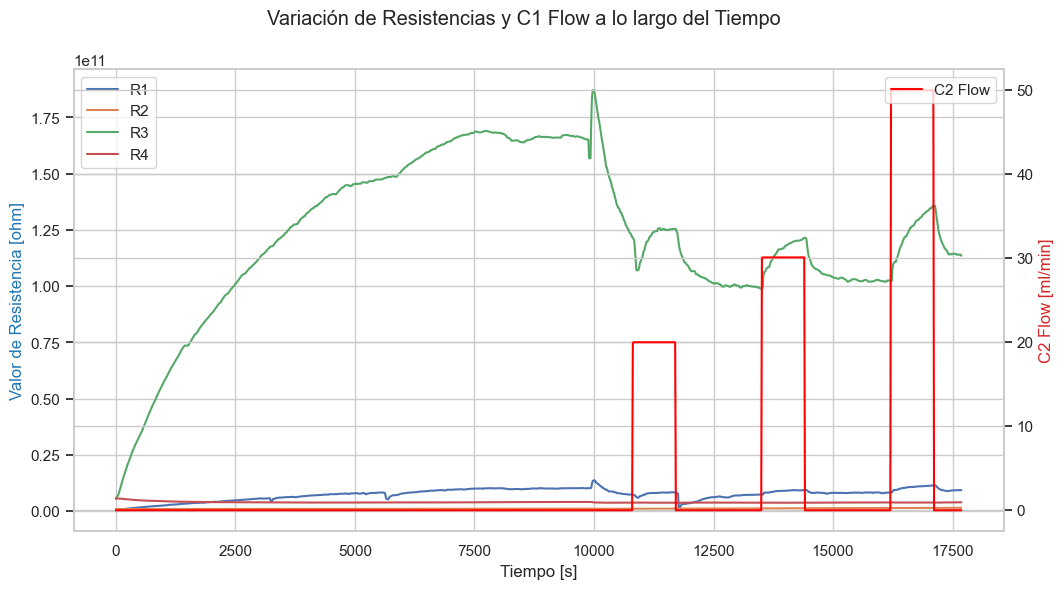

In [119]:
# Ignora temporalmente las advertencias de seaborn
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn")
warnings.filterwarnings("ignore", category=FutureWarning)

# Utiliza este dataframe
df = C3_CO2_50HR_Led365A

# Selecciona las columnas relevantes
selected_columns = ['Time [s]', 'R1 [ohm]', 'R2 [ohm]', 'R3 [ohm]', 'R4 [ohm]', 'C2 Flow [ml/min]']
df_selected = df[selected_columns]

# Configura el estilo de Seaborn (opcional)
sns.set(style="whitegrid")

# Crea el gráfico
fig, ax1 = plt.subplots(figsize=(12, 6))

# Líneas para las resistencias
sns.lineplot(x='Time [s]', y='R1 [ohm]', data=df_selected, label='R1', ax=ax1)
sns.lineplot(x='Time [s]', y='R2 [ohm]', data=df_selected, label='R2', ax=ax1)
sns.lineplot(x='Time [s]', y='R3 [ohm]', data=df_selected, label='R3', ax=ax1)
sns.lineplot(x='Time [s]', y='R4 [ohm]', data=df_selected, label='R4', ax=ax1)

ax1.set_xlabel('Tiempo [s]')
ax1.set_ylabel('Valor de Resistencia [ohm]', color='tab:blue')
ax1.legend(loc='upper left')

# Crea el segundo eje y
ax2 = ax1.twinx()

# Línea para C1 Flow
sns.lineplot(x='Time [s]', y='C2 Flow [ml/min]', data=df_selected, color='red', label='C2 Flow', ax=ax2)
ax2.set_ylabel('C2 Flow [ml/min]', color='tab:red')
ax2.legend(loc='upper right')

# Ajusta el formato de la leyenda y etiquetas
fig.suptitle('Variación de Resistencias y C1 Flow a lo largo del Tiempo')
plt.show()

### First data intake 

---------
# Correct signal: prepare processed data

### Prepare signal
Calculate the derivative of the sensor response to see if there is too great a variation in the signal.
If these large variations do not correspond to a measurement, it means that there is some error and data could be taken from that point. In this way, the signal drift can be corrected much better, than if this signal variation is included.

In [120]:
# Store a new dataframe to work with it
df_calculated = df_selected

# Calculate the difference between each element and its previous element in the 'Data' column, which is essentially the 
# discrete derivative of the series.
df_calculated['Derivative'] = df_calculated['R3 [ohm]'].diff().abs()
df_calculated.head()

C:\Users\carlo\AppData\Local\Temp\ipykernel_17200\3622438176.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_calculated['Derivative'] = df_calculated['R3 [ohm]'].diff().abs()


,Time [s],R1 [ohm],R2 [ohm],R3 [ohm],R4 [ohm],C2 Flow [ml/min],Derivative
0,0.004997,4.066758e+08,9.497456e+08,5.502743e+09,5.667619e+09,0.0,NaN
1,12.793347,4.337292e+08,9.508992e+08,5.970348e+09,5.657689e+09,0.0,467605000.0
2,27.793240,4.607827e+08,9.520529e+08,6.437953e+09,5.647759e+09,0.0,467605000.0
3,42.793107,4.931536e+08,9.528862e+08,7.024523e+09,5.637726e+09,0.0,586570000.0
4,57.792591,5.255245e+08,9.537194e+08,7.611093e+09,5.627693e+09,0.0,586570000.0
...,...,...,...,...,...,...,...
1175,17622.880329,9.318767e+09,1.482196e+09,1.139556e+11,3.935675e+09,0.0,0.0
1176,17637.880163,9.342860e+09,1.482574e+09,1.139750e+11,3.935675e+09,0.0,19400000.0
1177,17652.879983,9.342860e+09,1.483543e+09,1.139750e+11,3.935675e+09,0.0,0.0
1178,17667.879804,9.342860e+09,1.484641e+09,1.139750e+11,3.937611e+09,0.0,0.0


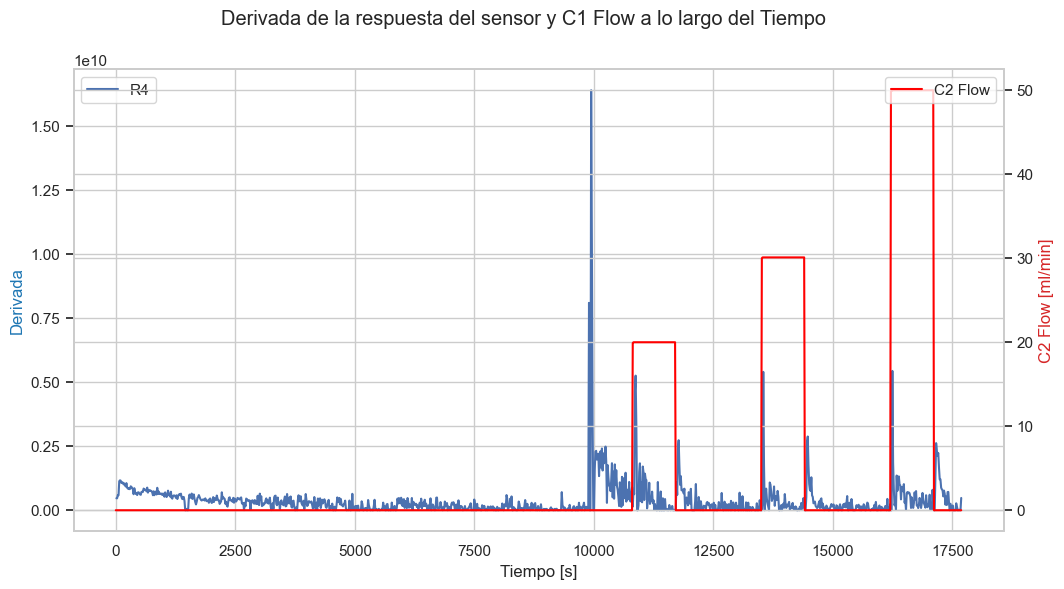

In [107]:
# Variables a representar
time = df_calculated['Time [s]']
derivative = df_calculated['Derivative']

# Crea el gráfico
fig, ax1 = plt.subplots(figsize=(12, 6))

# Línea para representar la derivada
sns.lineplot(x='Time [s]', y='Derivative', data=df_selected, label='R4', ax=ax1)
ax1.set_xlabel('Tiempo [s]')
ax1.set_ylabel('Derivada', color='tab:blue')
ax1.legend(loc='upper left')

# Crea el segundo eje y
ax2 = ax1.twinx()

# Línea para C1 Flow
sns.lineplot(x='Time [s]', y='C2 Flow [ml/min]', data=df_selected, color='red', label='C2 Flow', ax=ax2)
ax2.set_ylabel('C2 Flow [ml/min]', color='tab:red')
ax2.legend(loc='upper right')

# Ajusta el formato de la leyenda y etiquetas
fig.suptitle('Derivada de la respuesta del sensor y C1 Flow a lo largo del Tiempo')
plt.show()

In [132]:
df_calculated.head()

,Time [s],R1 [ohm],R2 [ohm],R3 [ohm],R4 [ohm],C2 Flow [ml/min],Derivative,change_ev,Variaciones_Normales,R1 [ohm] clean,R2 [ohm] clean,R3 [ohm] clean,R4 [ohm] clean
0,0.004997,406675800.0,949745600.0,5.502743e+09,5.667619e+09,0.0,NaN,1,NaN,NaN,NaN,NaN,NaN
1,12.793347,433729250.0,950899250.0,5.970348e+09,5.657689e+09,0.0,467605000.0,0,NaN,NaN,NaN,NaN,NaN
2,27.793240,460782700.0,952052900.0,6.437953e+09,5.647759e+09,0.0,467605000.0,0,NaN,NaN,NaN,NaN,NaN
3,42.793107,493153600.0,952886150.0,7.024523e+09,5.637726e+09,0.0,586570000.0,0,NaN,NaN,NaN,NaN,NaN
4,57.792591,525524500.0,953719400.0,7.611093e+09,5.627693e+09,0.0,586570000.0,0,NaN,NaN,NaN,NaN,NaN


In [142]:
# Filter the signal
#df_filtered = df_selected[df_selected['Time [s]']>10000]

# Crear una nueva columna 'Cambio' que indica cambios en la señal escalón
df_calculated['change_ev'] = (df_calculated['C2 Flow [ml/min]'].diff() != 0).astype(int)

# Especificar la ventana de tolerancia (en este caso, 8 puntos antes y después del cambio). 8 puntos equivale a 2 min, ya
# que la base de tiempos es de 15s (se toma un dato cada 15s).
ventana_tolerancia = 8

# Crear una máscara booleana para las variaciones dentro de la ventana de tolerancia
mask_tolerancia1 = df_calculated['change_ev'].rolling(window=ventana_tolerancia * 2 + 1).max() == 1

# Calcular la media de la deriva, para obtener el rango a partir del cual se considera erróneo
mean_dev = df_calculated['Derivative'].mean()
median_dev = df_calculated['Derivative'].median()

# Aplicar la máscara de tolerancia a la derivada y la condición de que la derivada sea mayor de 0.25
mask_derivada = (df_calculated['Derivative'][mask_tolerancia] > 0.25)

# Mostrar el DataFrame resultante
df_calculated = df_calculated[mask_tolerancia | mask_derivada]

# Aplicar la máscara de tolerancia a la derivada
#df_calculated['Variaciones_Normales'] = df_calculated['Derivative'][mask_tolerancia]
#df_calculated['R1 [ohm] clean'] = df_calculated['R1 [ohm]'][mask_tolerancia]
#df_calculated['R2 [ohm] clean'] = df_calculated['R2 [ohm]'][mask_tolerancia]
#df_calculated['R3 [ohm] clean'] = df_calculated['R3 [ohm]'][mask_tolerancia]
#df_calculated['R4 [ohm] clean'] = df_calculated['R4 [ohm]'][mask_tolerancia]
df_calculated.head()

C:\Users\carlo\AppData\Local\Temp\ipykernel_17200\2173627744.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_calculated = df_calculated[mask_tolerancia | mask_derivada]


,Time [s],R1 [ohm],R2 [ohm],R3 [ohm],R4 [ohm],C2 Flow [ml/min],Derivative,change_ev,Variaciones_Normales,R1 [ohm] clean,R2 [ohm] clean,R3 [ohm] clean,R4 [ohm] clean
16,237.792882,1.123374e+09,9.550628e+08,2.023420e+10,5.249546e+09,0.0,8.845600e+08,1,8.845600e+08,1.123374e+09,9.550628e+08,2.023420e+10,5.249546e+09
721,10812.845989,7.294871e+09,1.089580e+09,1.215951e+11,3.787304e+09,19.9,1.412000e+08,1,1.412000e+08,7.294871e+09,1.089580e+09,1.215951e+11,3.787304e+09
722,10827.845741,7.270184e+09,1.090937e+09,1.208598e+11,3.789912e+09,20.0,7.353000e+08,1,7.353000e+08,7.270184e+09,1.090937e+09,1.208598e+11,3.789912e+09
723,10842.846489,7.132771e+09,1.091238e+09,1.202351e+11,3.789912e+09,20.0,6.247000e+08,0,6.247000e+08,7.132771e+09,1.091238e+09,1.202351e+11,3.789912e+09
724,10857.846238,6.956022e+09,1.092452e+09,1.155964e+11,3.791787e+09,20.0,4.638700e+09,0,4.638700e+09,6.956022e+09,1.092452e+09,1.155964e+11,3.791787e+09


In [143]:
mean_dev
median_dev

816800000.0

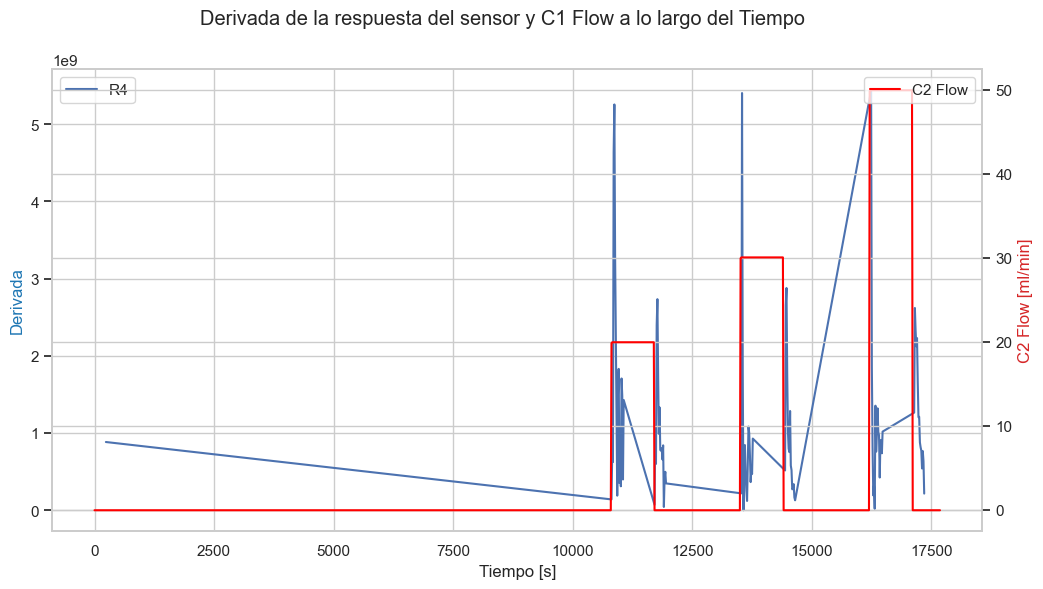

In [139]:
# Crea el gráfico
fig, ax1 = plt.subplots(figsize=(12, 6))

# Línea para representar la derivada
sns.lineplot(x='Time [s]', y='Variaciones_Normales', data=df_calculated, label='R4', ax=ax1)
ax1.set_xlabel('Tiempo [s]')
ax1.set_ylabel('Derivada', color='tab:blue')
ax1.legend(loc='upper left')

# Crea el segundo eje y
ax2 = ax1.twinx()

# Línea para C1 Flow
sns.lineplot(x='Time [s]', y='C2 Flow [ml/min]', data=df_selected, color='red', label='C2 Flow', ax=ax2)
ax2.set_ylabel('C2 Flow [ml/min]', color='tab:red')
ax2.legend(loc='upper right')

# Ajusta el formato de la leyenda y etiquetas
fig.suptitle('Derivada de la respuesta del sensor y C1 Flow a lo largo del Tiempo')
plt.show()

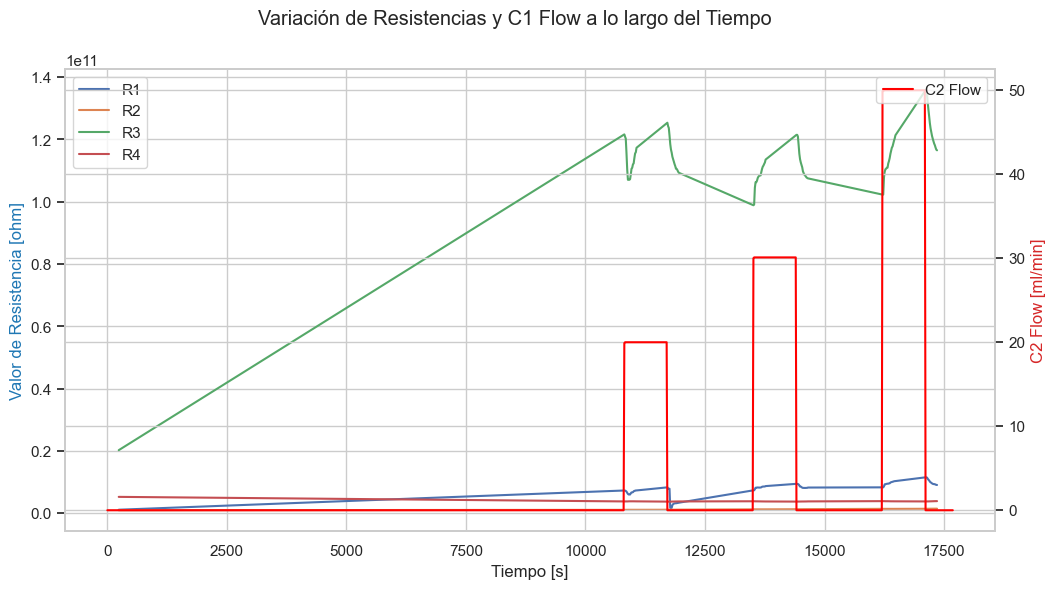

In [126]:
# Ignora temporalmente las advertencias de seaborn
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn")
warnings.filterwarnings("ignore", category=FutureWarning)

# Crea el gráfico
fig, ax1 = plt.subplots(figsize=(12, 6))

# Líneas para las resistencias
sns.lineplot(x='Time [s]', y='R1 [ohm] clean', data=df_calculated, label='R1', ax=ax1)
sns.lineplot(x='Time [s]', y='R2 [ohm] clean', data=df_calculated, label='R2', ax=ax1)
sns.lineplot(x='Time [s]', y='R3 [ohm] clean', data=df_calculated, label='R3', ax=ax1)
sns.lineplot(x='Time [s]', y='R4 [ohm] clean', data=df_calculated, label='R4', ax=ax1)

ax1.set_xlabel('Tiempo [s]')
ax1.set_ylabel('Valor de Resistencia [ohm]', color='tab:blue')
ax1.legend(loc='upper left')

# Crea el segundo eje y
ax2 = ax1.twinx()

# Línea para C1 Flow
sns.lineplot(x='Time [s]', y='C2 Flow [ml/min]', data=df_calculated, color='red', label='C2 Flow', ax=ax2)
ax2.set_ylabel('C2 Flow [ml/min]', color='tab:red')
ax2.legend(loc='upper right')

# Ajusta el formato de la leyenda y etiquetas
fig.suptitle('Variación de Resistencias y C1 Flow a lo largo del Tiempo')
plt.show()

### Remove drift signal

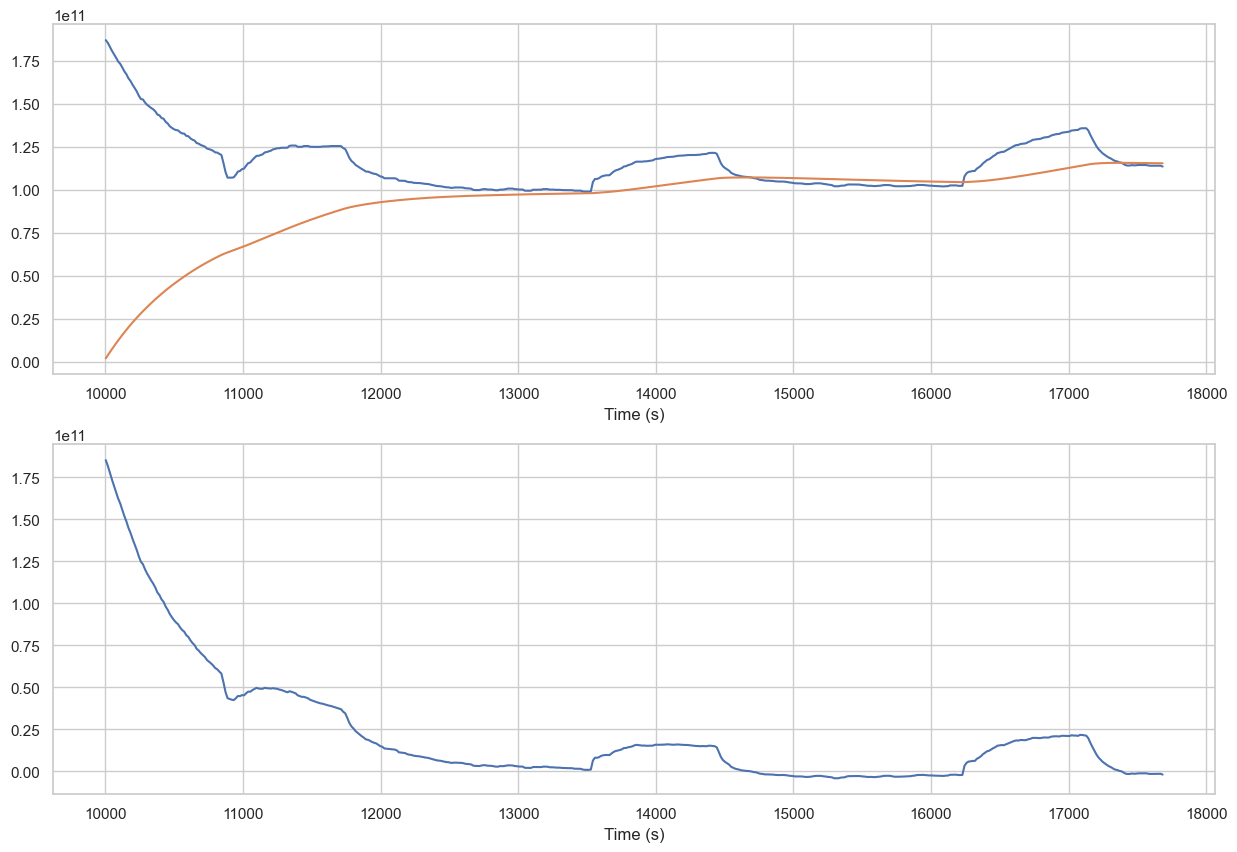

In [92]:
time = df_filtered['Time [s]']
signal = df_filtered['R3 [ohm]']

alpha = 1/100 # depends on fs and desired cutoff frequency
lowpassed = scipy.signal.lfilter([alpha], [1, -(1-alpha)], signal)
highpassed = signal - lowpassed

fig, axs = plt.subplots(2, 1, figsize=(15, 10))
axs[0].plot(time, signal)
axs[0].plot(time, lowpassed)
axs[1].plot(time, highpassed)
axs[0].set_xlabel('Time (s)')
axs[1].set_xlabel('Time (s)')
#axs[0].set_ylim([-3, +3])
#axs[1].set_ylim([-3, +3])
plt.show()

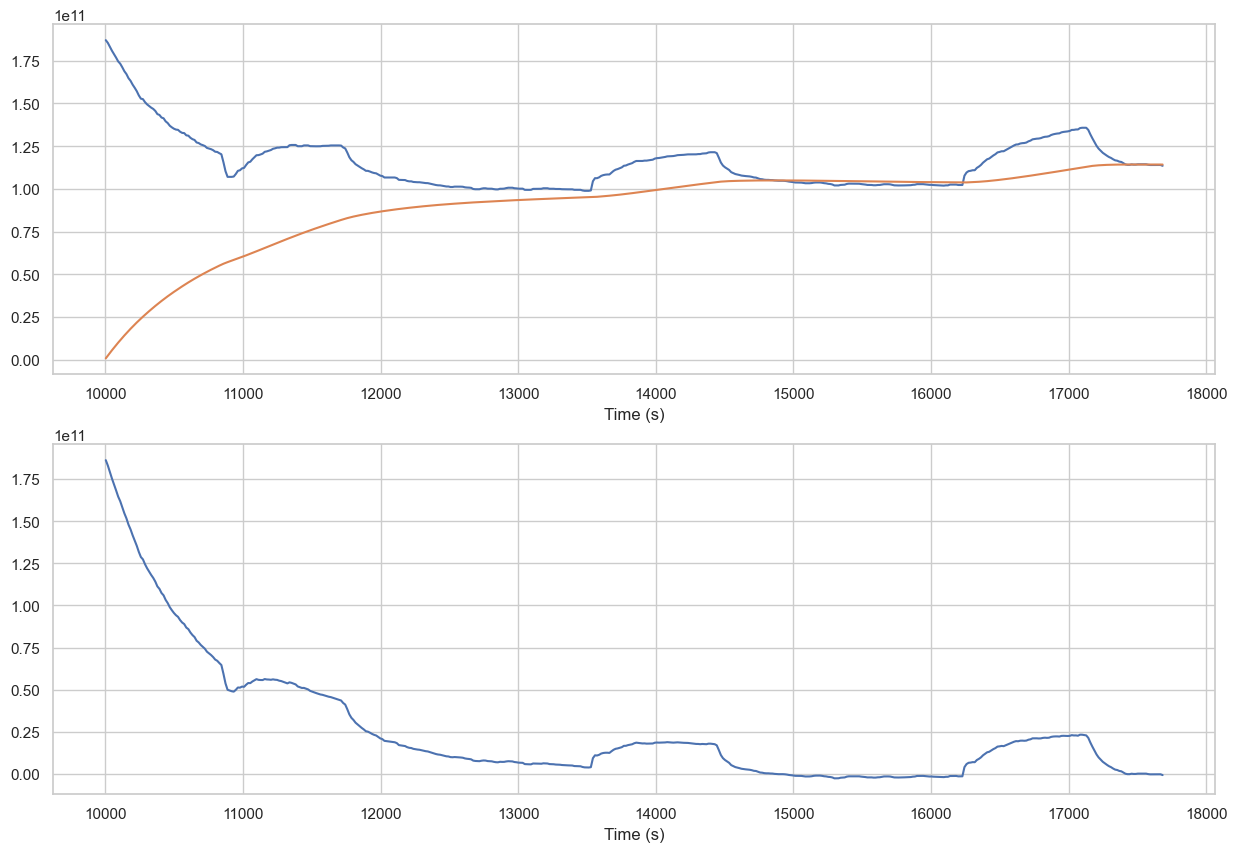

In [93]:
# Butterworth, first order, 0.5 Hz cutoff
lowpass = scipy.signal.butter(1, 0.5, btype='lowpass', fs=360, output='sos')
lowpassed = scipy.signal.sosfilt(lowpass, signal)
highpassed = signal - lowpassed

fig, axs = plt.subplots(2, 1, figsize=(15, 10))
axs[0].plot(time, signal)
axs[0].plot(time, lowpassed)
axs[1].plot(time, highpassed)
axs[0].set_xlabel('Time (s)')
axs[1].set_xlabel('Time (s)')
plt.show()

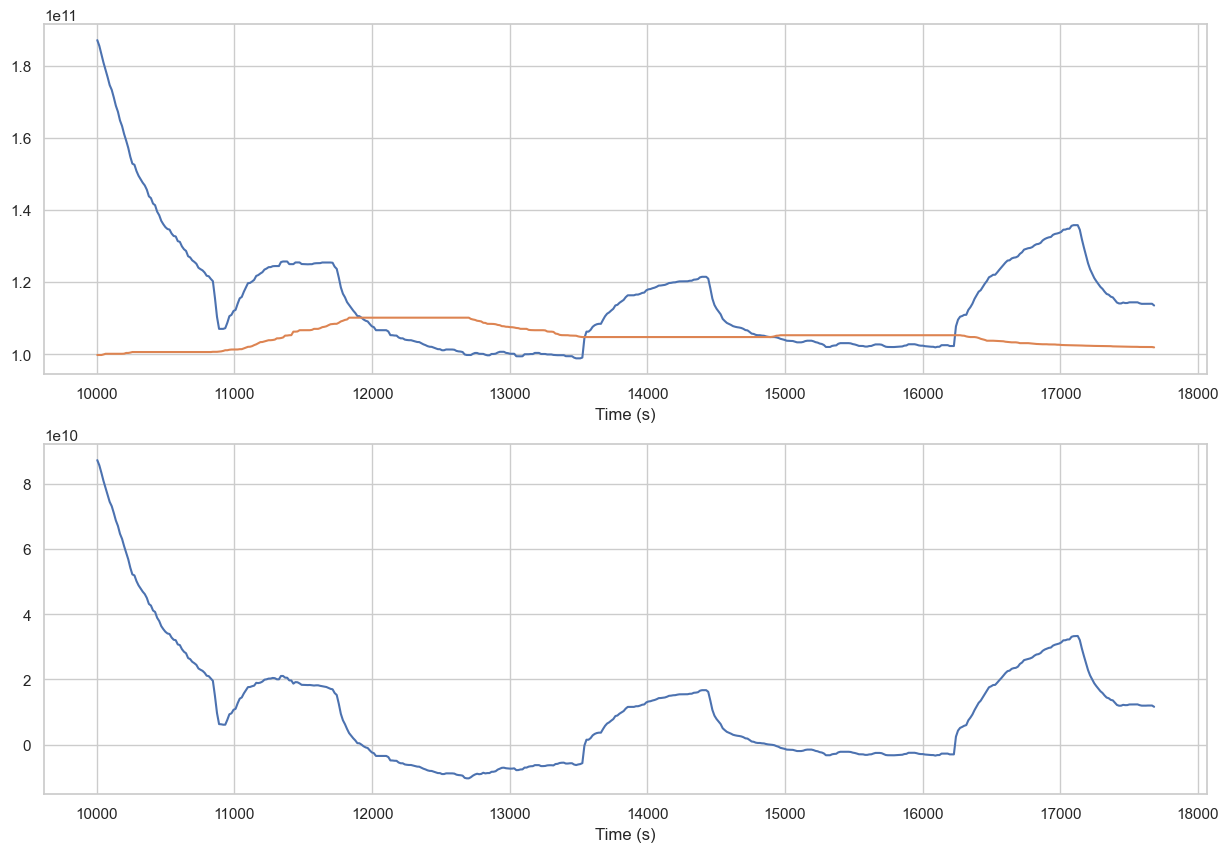

In [94]:
lowpassed = scipy.signal.medfilt(signal, kernel_size=360+1)
highpassed = signal - lowpassed

fig, axs = plt.subplots(2, 1, figsize=(15, 10))
axs[0].plot(time, signal)
axs[0].plot(time, lowpassed)
axs[1].plot(time, highpassed)
axs[0].set_xlabel('Time (s)')
axs[1].set_xlabel('Time (s)')
plt.show()

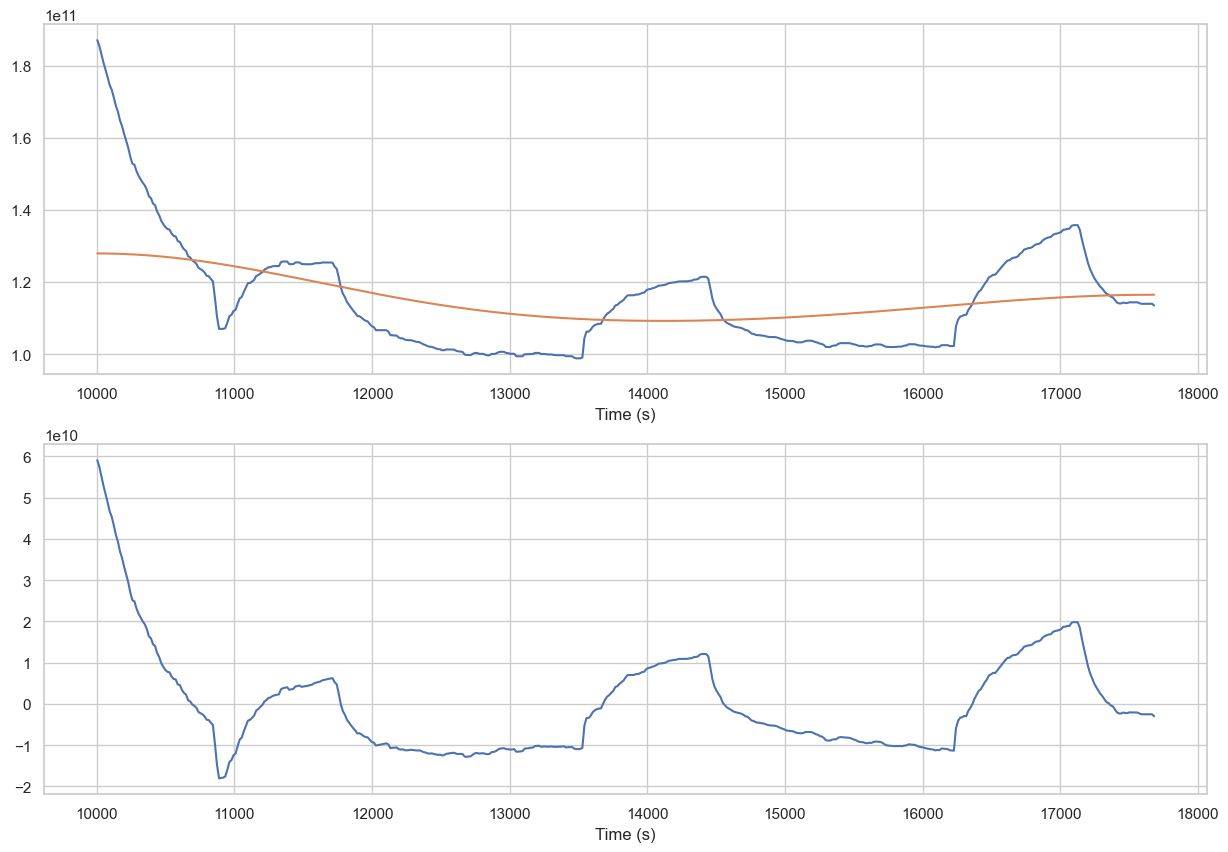

In [95]:
lowpassed = scipy.ndimage.gaussian_filter1d(signal, sigma=0.2 * 500, order=0)
highpassed = signal - lowpassed

fig, axs = plt.subplots(2, 1, figsize=(15, 10))
axs[0].plot(time, signal)
axs[0].plot(time, lowpassed)
axs[1].plot(time, highpassed)
axs[0].set_xlabel('Time (s)')
axs[1].set_xlabel('Time (s)')
plt.show()